In [1]:
#importo las librerias
import pandas as pd
import numpy as np

In [2]:
#estoy usando google colab por lo que traigo el archivo de esta manera
from google.colab import files

In [4]:
#cargo el archivo a colab
files.upload()

In [5]:
#cargo el dataset
df=pd.read_csv('movies_dataset.csv')

<ipython-input-5-73e2c18496a9>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_dataset.csv')


In [6]:
#reviso las primeras filas para ver los formatos
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
#veo las dimensiones del dataset
df.shape

(45466, 24)

In [8]:
#veo el nombre de las columnas
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
#veo el tipo de dato de cada columna y la cantidad de no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [10]:
#reviso el formato de las columnas anidadas
df.iloc[0,1]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

En esta seccion voy a desanidar las columnas belongs_to_collection, genres, production_companies, production_countries y spoken_languages.

In [11]:
#creo la funcion para desanidar la columna belongs_to_collection
def unnest_key_value_belongs_to_collection(row):
    if pd.isna(row['belongs_to_collection']):
        return pd.Series()
    else:
        key_value_pairs = row['belongs_to_collection'].split(', ')
        details = {}
        for pair in key_value_pairs:
            pair_split = pair.split(':')
            if len(pair_split)==2:
                key, value = pair_split
                details[key.strip().replace("'","").replace("{", "").replace("}", "")] = value.strip().replace("'","").replace("{", "").replace("}", "")
        return pd.Series(details)


In [12]:
#desanido la columna belongs_to_collection
df_unnested_belongs_to_collection = df.apply(unnest_key_value_belongs_to_collection, axis=1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-11-14d5d11015af>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
<ipython-input-11-14d5d11015af>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
<ipython-input-11-14d5d11015af>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
<ipython-input-11-14d5d11015af>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()
<ipython-input-11-14d5d11015af>:4: FutureWarning: The default dty

In [13]:
#veo como quedo desanidada
df_unnested_belongs_to_collection

,backdrop_path,id,name,poster_path
0,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg
1,NaN,NaN,NaN,NaN
2,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg
3,NaN,NaN,NaN,NaN
4,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg
...,...,...,...,...
45461,NaN,NaN,NaN,NaN
45462,NaN,NaN,NaN,NaN
45463,NaN,NaN,NaN,NaN
45464,NaN,NaN,NaN,NaN


In [14]:
#cambio las columnas de nombre
df_unnested_belongs_to_collection.rename(columns={'backdrop_path':'backdrop_path_belongs_to_collection'}, inplace=True)
df_unnested_belongs_to_collection.rename(columns={'id':'id_belongs_to_collection'}, inplace=True)
df_unnested_belongs_to_collection.rename(columns={'name':'name_belongs_to_collection'}, inplace=True)
df_unnested_belongs_to_collection.rename(columns={'poster_path':'poster_path_belongs_to_collection'}, inplace=True)

In [15]:
#veo como quedo el cambio de nombre de las columnas
df_unnested_belongs_to_collection

,backdrop_path_belongs_to_collection,id_belongs_to_collection,name_belongs_to_collection,poster_path_belongs_to_collection
0,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg
1,NaN,NaN,NaN,NaN
2,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg
3,NaN,NaN,NaN,NaN
4,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg
...,...,...,...,...
45461,NaN,NaN,NaN,NaN
45462,NaN,NaN,NaN,NaN
45463,NaN,NaN,NaN,NaN
45464,NaN,NaN,NaN,NaN


In [16]:
#creo la funcion para desanidar la columna genres
def unnest_key_value_genres(row):
    if pd.isna(row['genres']):
        return pd.Series()
    else:
        key_value_pairs = row['genres'].split(', ')
        details = {}
        for pair in key_value_pairs:
            pair_split = pair.split(':')
            if len(pair_split)==2:
                key, value = pair_split
                details[key.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")] = value.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")
        return pd.Series(details)

In [17]:
#desanido la columna genres
df_unnested_genres = df.apply(unnest_key_value_genres, axis=1)

<ipython-input-16-1ea6cbc47c9f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-16-1ea6cbc47c9f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-16-1ea6cbc47c9f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-16-1ea6cbc47c9f>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-16-1ea6cbc47c9f>:13: FutureWarning: The default dtype for empty Series will be 'objec

In [18]:
#veo como quedo desanidada
df_unnested_genres

,id,name
0,10751,Family
1,10751,Family
2,35,Comedy
3,10749,Romance
4,35,Comedy
...,...,...
45461,10751,Family
45462,18,Drama
45463,53,Thriller
45464,NaN,NaN


In [19]:
#cambio las columnas de nombre
df_unnested_genres.rename(columns={'id':'id_genres'}, inplace=True)
df_unnested_genres.rename(columns={'name':'name_genres'}, inplace=True)

In [20]:
#veo como quedo el cambio de nombre de las columnas
df_unnested_genres

,id_genres,name_genres
0,10751,Family
1,10751,Family
2,35,Comedy
3,10749,Romance
4,35,Comedy
...,...,...
45461,10751,Family
45462,18,Drama
45463,53,Thriller
45464,NaN,NaN


In [21]:
#creo la funcion para desanidar la columna production companies
def unnest_key_value_production_companies(row):
    if pd.isna(row['production_companies']):
        return pd.Series()
    else:
        key_value_pairs = row['production_companies'].split(', ')
        details = {}
        for pair in key_value_pairs:
            pair_split = pair.split(':')
            if len(pair_split)==2:
                key, value = pair_split
                details[key.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")] = value.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")
        return pd.Series(details)

In [22]:
#desanido la columna production companies
df_unnested_production_companies = df.apply(unnest_key_value_production_companies, axis=1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-21-ced0f26855b5>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-21-ced0f26855b5>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-21-ced0f26855b5>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-21-ced0f26855b5>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-21-ced0f26855b5>:1

In [23]:
#veo como quedo desanidada
df_unnested_production_companies

,id,name
0,3,Pixar Animation Studios
1,10201,Interscope Communications
2,19464,Lancaster Gate
3,306,Twentieth Century Fox Film Corporation
4,9195,Touchstone Pictures
...,...,...
45461,NaN,NaN
45462,19653,Sine Olivia
45463,6165,American World Pictures
45464,88753,Yermoliev


In [24]:
#cambio las columnas de nombre
df_unnested_production_companies.rename(columns={'id':'id_production_companies'}, inplace=True)
df_unnested_production_companies.rename(columns={'name':'name_production_companies'}, inplace=True)

In [25]:
#veo como quedo el cambio de nombre de las columnas
df_unnested_production_companies

,id_production_companies,name_production_companies
0,3,Pixar Animation Studios
1,10201,Interscope Communications
2,19464,Lancaster Gate
3,306,Twentieth Century Fox Film Corporation
4,9195,Touchstone Pictures
...,...,...
45461,NaN,NaN
45462,19653,Sine Olivia
45463,6165,American World Pictures
45464,88753,Yermoliev


In [26]:
#creo la funcion para desanidar la columna production countries
def unnest_key_value_production_countries(row):
    if pd.isna(row['production_countries']):
        return pd.Series()
    else:
        key_value_pairs = row['production_countries'].split(', ')
        details = {}
        for pair in key_value_pairs:
            pair_split = pair.split(':')
            if len(pair_split)==2:
                key, value = pair_split
                details[key.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")] = value.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")
        return pd.Series(details)

In [27]:
#desanido la columna production countries
df_unnested_production_countries = df.apply(unnest_key_value_production_countries, axis=1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-26-f89d978b4939>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-26-f89d978b4939>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-26-f89d978b4939>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-26-f89d978b4939>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-26-f89d978b4939>:1

In [28]:
#veo como quedo desanidada
df_unnested_production_countries

,iso_3166_1,name
0,US,United States of America
1,US,United States of America
2,US,United States of America
3,US,United States of America
4,US,United States of America
...,...,...
45461,IR,Iran
45462,PH,Philippines
45463,US,United States of America
45464,RU,Russia


In [29]:
#cambio las columnas de nombre
df_unnested_production_countries.rename(columns={'iso_3166_1':'iso_3166_1_production_countries'}, inplace=True)
df_unnested_production_countries.rename(columns={'name':'name_production_countries'}, inplace=True)

In [30]:
#veo como quedo el cambio de nombre de las columnas
df_unnested_production_countries

,iso_3166_1_production_countries,name_production_countries
0,US,United States of America
1,US,United States of America
2,US,United States of America
3,US,United States of America
4,US,United States of America
...,...,...
45461,IR,Iran
45462,PH,Philippines
45463,US,United States of America
45464,RU,Russia


In [31]:
#creo la funcion para desanidar la columna spoken_languages
def unnest_key_value_spoken_languages(row):
    if pd.isna(row['spoken_languages']):
        return pd.Series()
    else:
        key_value_pairs = row['spoken_languages'].split(', ')
        details = {}
        for pair in key_value_pairs:
            pair_split = pair.split(':')
            if len(pair_split)==2:
                key, value = pair_split
                details[key.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")] = value.strip().replace("'","").replace("{", "").replace("}", "").replace("[", "").replace("]", "")
        return pd.Series(details)

In [32]:
#desanido la columna spoken_languages
df_unnested_spoken_languages = df.apply(unnest_key_value_spoken_languages, axis=1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-31-f67454710619>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-31-f67454710619>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-31-f67454710619>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-31-f67454710619>:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(details)
<ipython-input-31-f67454710619>:1

In [33]:
#veo como quedo desanidada
df_unnested_spoken_languages

,iso_639_1,name
0,en,English
1,fr,Français
2,en,English
3,en,English
4,en,English
...,...,...
45461,fa,فارسی
45462,tl,
45463,en,English
45464,NaN,NaN


In [34]:
#cambio las columnas de nombre
df_unnested_spoken_languages.rename(columns={'iso_639_1':'iso_639_1_spoken_languages'}, inplace=True)
df_unnested_spoken_languages.rename(columns={'name':'name_spoken_languages'}, inplace=True)

In [35]:
#veo como quedo el cambio de nombre de las columnas
df_unnested_spoken_languages

,iso_639_1_spoken_languages,name_spoken_languages
0,en,English
1,fr,Français
2,en,English
3,en,English
4,en,English
...,...,...
45461,fa,فارسی
45462,tl,
45463,en,English
45464,NaN,NaN


In [36]:
#concateno el dataset original con la primera columna desanidada belongs_to_collection
df_expanded_belongs_to_collection = pd.concat([df, df_unnested_belongs_to_collection], axis=1)

In [37]:
#concateno el dataset modificado con la segunda columna desanidada genres
df_expanded_genres = pd.concat([df_expanded_belongs_to_collection, df_unnested_genres], axis=1)

In [38]:
#concateno el dataset modificado con la tercera columna desanidada production companies
df_expanded_production_companies = pd.concat([df_expanded_genres, df_unnested_production_companies], axis=1)

In [39]:
#concateno el dataset modificado con la cuarta columna desanidada production countries
df_expanded_production_countries = pd.concat([df_expanded_production_companies, df_unnested_production_countries], axis=1)

In [40]:
#concateno el dataset modificado con la quinta columna desanidada spoken_languages
df_expanded_final = pd.concat([df_expanded_production_countries, df_unnested_spoken_languages], axis=1)

In [41]:
#veo como quedo el dataset todo expandido
df_expanded_final

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,name_belongs_to_collection,poster_path_belongs_to_collection,id_genres,name_genres,id_production_companies,name_production_companies,iso_3166_1_production_countries,name_production_countries,iso_639_1_spoken_languages,name_spoken_languages
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,10751,Family,3,Pixar Animation Studios,US,United States of America,en,English
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,10751,Family,10201,Interscope Communications,US,United States of America,fr,Français
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,35,Comedy,19464,Lancaster Gate,US,United States of America,en,English
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,10749,Romance,306,Twentieth Century Fox Film Corporation,US,United States of America,en,English
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,35,Comedy,9195,Touchstone Pictures,US,United States of America,en,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,NaN,10751,Family,NaN,NaN,IR,Iran,fa,فارسی
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,NaN,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,NaN,NaN,53,Thriller,6165,American World Pictures,US,United States of America,en,English
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,NaN,NaN,NaN,NaN,88753,Yermoliev,RU,Russia,NaN,NaN


In [42]:
#chequeo los datos que quedaron en el nuevo dataset
df_expanded_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                45466 non-null  object 
 1   belongs_to_collection                4494 non-null   object 
 2   budget                               45466 non-null  object 
 3   genres                               45466 non-null  object 
 4   homepage                             7782 non-null   object 
 5   id                                   45466 non-null  object 
 6   imdb_id                              45449 non-null  object 
 7   original_language                    45455 non-null  object 
 8   original_title                       45466 non-null  object 
 9   overview                             44512 non-null  object 
 10  popularity                           45461 non-null  object 
 11  poster_path                 

En esta seccion voy a realizar las otras tranformaciones solicitadas:

-Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

-Los valores nulos del campo release date deben eliminarse.

-De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

-Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

-Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,vote_count,poster_path y homepage

In [43]:
#chequeo el tipo de datos del campo revenue
df_expanded_final['revenue'].dtypes

dtype('float64')

In [44]:
#veo la cantidad de nulos del campo revenue
df_expanded_final['revenue'].isnull().sum()

6

In [45]:
#cambio los valores nulos de revenue por 0
df_expanded_final['revenue']=df_expanded_final['revenue'].fillna(0)

In [46]:
#chequeo el tipo de datos del campo budget
df_expanded_final['budget'].dtypes

dtype('O')

In [47]:
#df_expanded_final['budget'] = pd.to_numeric(df_expanded_final['budget']).este codigo da error


In [48]:
#con el codigo anterior se detecta errores al querer pasar a formato numero la columna budget asi que se van a imprimir antes de eliminar
for value in df_expanded_final['budget']:
    try:
        pd.to_numeric(value)
    except ValueError:
        print("Valor inválido:", value)

Valor inválido: /ff9qCepilowshEtG2GYWwzt2bs4.jpg
Valor inválido: /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
Valor inválido: /zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [49]:
#son errores que esos datos no corresponden a ese campo por lo que hay que convertirlos
df_expanded_final['budget'] = pd.to_numeric(df_expanded_final['budget'],  errors='coerce')

In [50]:
#veo la cantidad de nulos del campo budget
df_expanded_final['budget'].isnull().sum()

3

In [51]:
#cambio los valores nulos de budget por 0
df_expanded_final['budget']=df_expanded_final['budget'].fillna(0)

In [52]:
#paso el string NaN a null value en el campo release_date
df_expanded_final['release_date'].replace('NaN', np.nan, inplace=True)

In [53]:
#veo la cantidad de nulos del campo relase
df_expanded_final['release_date'].isnull().sum()

87

In [54]:
#elimino los valores nulos del campo release_date
df_expanded_final.dropna(subset=['release_date'], inplace=True)

In [55]:
#cambio el tipo de dato object a date en el campo relase_date
#df_expanded_final['release_date'] = pd.to_datetime(df_expanded_final['release_date']).este codigo da error


In [56]:
#con el codigo anterior se detecta errores al querer pasar a formato fecha la columna release_date asi que se van a imprimir antes de eliminar
for value in df_expanded_final['release_date']:
    try:
        pd.to_datetime(value)
    except ValueError:
        print("Valor inválido:", value)

Valor inválido: 1
Valor inválido: 12
Valor inválido: 22


In [57]:
#los errores en release_date no formateables por lo que deben completarse con NaT (Not a Time) 
df_expanded_final['release_date'] = pd.to_datetime(df_expanded_final['release_date'], errors='coerce')

In [58]:
#chequeo la cantidad de nulos en relase_date
df_expanded_final['release_date'].isnull().sum()

3

In [59]:
#elimino esos 3 nulos extras que se generaron por el error
df_expanded_final.dropna(subset=['release_date'], inplace=True)

In [60]:
#chequeo la conversion a formato fecha en release_year
df_expanded_final['release_date'].dtypes

dtype('<M8[ns]')

In [61]:
#creo la columna release_year
df_expanded_final['release_year']=df_expanded_final['release_date'].dt.year.astype(int)

In [62]:
#veo como esta quedando el dataset
df_expanded_final.shape

(45376, 37)

In [63]:
#creo la columna return completando con 0 los errores
try:
  df_expanded_final['return'] = df_expanded_final['revenue'] / df_expanded_final['budget']
# cambio los nan por 0
  df_expanded_final['return'] = df_expanded_final['return'].fillna(0)
# cambio los inf por 0
  df_expanded_final['return'] = df_expanded_final['return'].replace([np.inf, -np.inf], 0) 
except ZeroDivisionError:
  df_expanded_final['return'] = 0
except Exception as e:
  print("Error:", e)
  df_expanded_final['return'] = 0  # Manejar otros posibles errores

In [64]:
#df_expanded_final.drop('return', axis=1, inplace=True)

In [65]:
#veo como esta quedando el dataset
df_expanded_final.shape

(45376, 38)

In [66]:
#elimino las columnas solicitadas 'video','imdb_id','adult','original_title','vote_count','poster_path' y 'homepage'
df_expanded_final=df_expanded_final.drop(['video','imdb_id','adult','original_title','vote_count','poster_path','homepage'], axis=1)

Veo como quedo el Dataset con el ETL realizado

In [67]:
df_expanded_final.shape

(45376, 31)

In [68]:
df_expanded_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   belongs_to_collection                4488 non-null   object        
 1   budget                               45376 non-null  float64       
 2   genres                               45376 non-null  object        
 3   id                                   45376 non-null  object        
 4   original_language                    45365 non-null  object        
 5   overview                             44435 non-null  object        
 6   popularity                           45376 non-null  object        
 7   production_companies                 45376 non-null  object        
 8   production_countries                 45376 non-null  object        
 9   release_date                         45376 non-null  datetime64[ns]
 10  revenue   

In [69]:
df_expanded_final.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,id_genres,name_genres,id_production_companies,name_production_companies,iso_3166_1_production_countries,name_production_countries,iso_639_1_spoken_languages,name_spoken_languages,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,10751,Family,3,Pixar Animation Studios,US,United States of America,en,English,1995,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,10751,Family,10201,Interscope Communications,US,United States of America,fr,Français,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,35,Comedy,19464,Lancaster Gate,US,United States of America,en,English,1995,0.000000
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,10749,Romance,306,Twentieth Century Fox Film Corporation,US,United States of America,en,English,1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,35,Comedy,9195,Touchstone Pictures,US,United States of America,en,English,1995,0.000000


In [70]:
#guardo en csv el dataset transformado
#df_expanded_final.to_csv('dataset_movies_con_ETL.csv', index=False)

En esta seccion comienzo en analisis exploratorio

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [72]:
#saco las columnas que desanide
df_ml=df_expanded_final.drop(['belongs_to_collection','genres','production_companies','production_countries','spoken_languages'], axis=1)

In [73]:
#saco las columnas que no me aportan informacion como las de id
df_ml.drop(['id','id_belongs_to_collection','id_genres','id_production_companies','iso_639_1_spoken_languages','iso_3166_1_production_countries'], axis=1, inplace=True)


In [74]:
#saco las direcciones que me llevan a los jpg
df_ml.drop(['backdrop_path_belongs_to_collection','poster_path_belongs_to_collection'], axis=1, inplace=True)

In [75]:
# saco la columna de la fecha de estreno ya que voy a usar solo de del año
df_ml.drop(['release_date'], axis=1, inplace=True)

In [76]:
#saco las columnas de costos ya que considero que no afectan en la decision del usuario
df_ml.drop(['budget','revenue','return'], axis=1, inplace=True)

In [77]:
#veo las columnas que me quedaron
df_ml.columns

Index(['original_language', 'overview', 'popularity', 'runtime', 'status',
       'tagline', 'title', 'vote_average', 'name_belongs_to_collection',
       'name_genres', 'name_production_companies', 'name_production_countries',
       'name_spoken_languages', 'release_year'],
      dtype='object')

In [78]:
#como el dataset es muy grande y no tengo memoria voy a filtrar por las peliculas que se hayan hecho en EEUU
df_ml=df_ml.loc[df_ml['name_production_countries']=='United States of America']

In [79]:
#veo la cantidad datos no nulos por columna y el tipo de dato
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20329 entries, 0 to 45463
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   original_language           20325 non-null  object 
 1   overview                    20296 non-null  object 
 2   popularity                  20329 non-null  object 
 3   runtime                     20325 non-null  float64
 4   status                      20315 non-null  object 
 5   tagline                     13476 non-null  object 
 6   title                       20329 non-null  object 
 7   vote_average                20329 non-null  float64
 8   name_belongs_to_collection  2436 non-null   object 
 9   name_genres                 20118 non-null  object 
 10  name_production_companies   17930 non-null  object 
 11  name_production_countries   20329 non-null  object 
 12  name_spoken_languages       19809 non-null  object 
 13  release_year                203

In [80]:
#cambio la columna popularity a un tipo numero
df_ml['popularity'] = pd.to_numeric(df_ml['popularity'])


In [81]:
#cambio todo a letra miniscula
df_ml['original_language']=df_ml['original_language'].str.lower()
df_ml['overview']=df_ml['overview'].str.lower()
df_ml['status']=df_ml['status'].str.lower()
df_ml['tagline']=df_ml['tagline'].str.lower()
df_ml['title']=df_ml['title'].str.lower()
df_ml['name_belongs_to_collection']=df_ml['name_belongs_to_collection'].str.lower()
df_ml['name_genres']=df_ml['name_genres'].str.lower()
df_ml['name_production_companies']=df_ml['name_production_companies'].str.lower()
df_ml['name_production_countries']=df_ml['name_production_countries'].str.lower()
df_ml['name_spoken_languages']=df_ml['name_spoken_languages'].str.lower()

In [82]:
#veo los valores distitos en algunas columnas para chequear los formatos. por ej que siempre este united states of america y no tambien USA
df_ml['status'].unique()

array(['released', 'rumored', nan, 'post production', 'in production',
       'planned'], dtype=object)

In [83]:
df_ml['name_genres'].unique()

array(['family', 'comedy', 'romance', 'thriller', 'horror', 'adventure',
       'drama', 'crime', 'mystery', 'war', 'history', 'fantasy',
       'science fiction', 'documentary', 'foreign', 'action', 'western',
       'tv movie', 'animation', 'music', nan], dtype=object)

In [84]:
df_ml['name_production_companies'].unique()

array(['pixar animation studios', 'interscope communications',
       'lancaster gate', ..., 'he and she films', 'pirie productions',
       'canwest global communications'], dtype=object)

In [85]:
df_ml['name_production_countries'].unique()

array(['united states of america'], dtype=object)

In [86]:
df_ml['name_spoken_languages'].unique()

array(['english', 'français', 'español', 'deutsch', 'latin', 'nederlands',
       'magyar', 'pусский', '', 'bosanski', 'română', 'bahasa melayu',
       '日本語', 'svenska', '普通话', '广州话 / 廣州話', 'gaeilge', 'slovenčina',
       'tiếng việt', nan, 'italiano', 'český', 'português', 'latviešu',
       'kiswahili', 'polski', 'esperanto', 'suomi', 'ελληνικά',
       'hrvatski', 'türkçe', 'ภาษาไทย', 'cymraeg', 'afrikaans',
       'íslenska', 'עִבְרִית', 'norsk', 'العربية', '한국어/조선말', 'فارسی',
       'no language', 'euskera', 'اردو', 'somali', 'ਪੰਜਾਬੀ', 'हिन्दी',
       'srpski', 'বাংলা', 'wolof', 'український', 'kinyarwanda', 'shqip',
       'қазақ', 'தமிழ்', 'ქართული', 'lietuvi\\x9akai', 'български език',
       'bahasa indonesia', 'dansk', 'eesti', '?????'], dtype=object)

In [87]:
df_ml['original_language'].unique()

array(['en', 'fr', 'it', 'zh', 'sv', 'de', 'cn', 'pt', 'xx', 'ja', 'es',
       'bo', 'el', 'sk', 'eo', 'tr', 'wo', 'ru', 'he', 'da', 'ab', 'rw',
       'hi', 'ko', 'nl', 'cs', 'fa', nan, 'ar', 'mk', 'sr', 'kn', 'ur',
       'pl'], dtype=object)

In [88]:
#como me faltan la mitad de los datos en tagline no voy a usar esa columna para la prediccion
df_ml_mod=df_ml.drop(['tagline'], axis=1)

In [89]:
df_ml_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20329 entries, 0 to 45463
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   original_language           20325 non-null  object 
 1   overview                    20296 non-null  object 
 2   popularity                  20329 non-null  float64
 3   runtime                     20325 non-null  float64
 4   status                      20315 non-null  object 
 5   title                       20329 non-null  object 
 6   vote_average                20329 non-null  float64
 7   name_belongs_to_collection  2436 non-null   object 
 8   name_genres                 20118 non-null  object 
 9   name_production_companies   17930 non-null  object 
 10  name_production_countries   20329 non-null  object 
 11  name_spoken_languages       19809 non-null  object 
 12  release_year                20329 non-null  int64  
dtypes: float64(3), int64(1), object

In [90]:
#como perderia pocos datos elimino las filas con nulos en runtime
df_ml_mod=df_ml_mod.dropna(subset=['runtime'])

In [91]:
#voy a completar los null con string nan
df_ml_mod=df_ml_mod.fillna({'overview':'nan','status':'nan','name_belongs_to_collection':'nan','name_genres':'nan','name_production_companies':'nan','name_production_countries':'nan','original_language':'nan','name_spoken_languages':'nan'})

Para el procesamiento de las columnas title y overview voy a utilizar nltk

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [93]:
# definir palabras de parada (stop words)
stop_words = set(stopwords.words('english'))

In [94]:
# inicializar el lematizador
lemmatizer = WordNetLemmatizer()

In [95]:
# inicializar el stemmer
stemmer = PorterStemmer()

In [96]:
# Función para limpiar y preprocesar el texto de la descripción
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    # Eliminación de palabras de parada y signos de puntuación
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    # Lemmatización
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Unir los tokens en una cadena de texto nuevamente
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [97]:
#aplico el procesamiento de lenguaje a la columna title
df_ml_mod['title_mod'] = df_ml_mod['title'].apply(preprocess_text)

In [98]:
#aplico el procesamiento de lenguaje a la columna overview
#df_ml_mod['overview_mod'] = df_ml_mod['overview'].apply(preprocess_text)

In [99]:
#veo como quedo la columna title
df_ml_mod['title_mod']

0                   toy stori
1                     jumanji
2            grumpier old men
3                  wait exhal
4        father bride part ii
                 ...         
45456             hous horror
45458           burkittsvil 7
45459          cage heat 3000
45460              robin hood
45463                  betray
Name: title_mod, Length: 20325, dtype: object

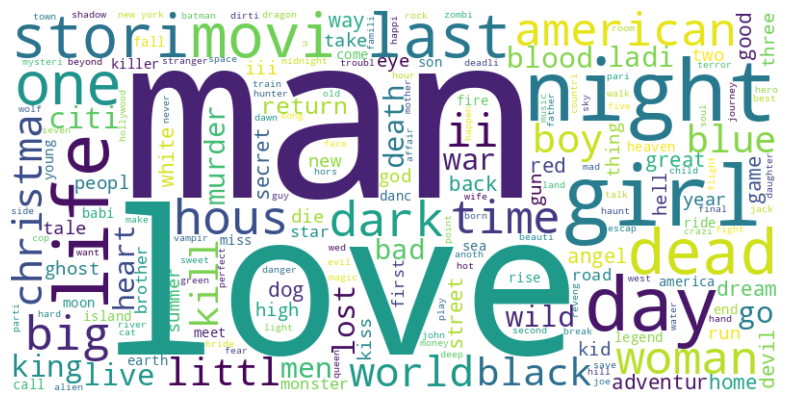

In [100]:
#obtengo los textos de la columna en una cadena de texto
text = ' '.join(df_ml_mod['title_mod'].values)
#creo el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#muestro la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [101]:
#veo como quedo la columna overview
#df_ml_mod['overview_mod']

In [102]:
# Obtengo la matriz de características de title utilizando TF-IDF
tfidf_title = TfidfVectorizer(stop_words='english')
title_features = tfidf_title.fit_transform(df_ml_mod['title_mod'])

In [103]:
# Obtener la matriz de características de title utilizando TF-IDF
#tfidf_overview = TfidfVectorizer(stop_words='english')
#overview_features = tfidf_overview.fit_transform(df_ml_mod['overview_mod'])

In [104]:
title_features

<20325x9603 sparse matrix of type '<class 'numpy.float64'>'
	with 40459 stored elements in Compressed Sparse Row format>

In [105]:
#voy a reducir la dimension de la matriz
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import TruncatedSVD

In [106]:
title_features_mod=title_features.tocsr()
#overview_features_mod=overview_features.tocsr()

In [107]:
#reduzco la dimensionalidad con TruncatedSVD
n_components = 1000  # Número de componentes deseados
svd = TruncatedSVD(n_components=n_components)
reduced_matrix_title = svd.fit_transform(title_features_mod)

In [108]:
# Reducir la dimensionalidad con TruncatedSVD
# por un tema de que no tengo capacidad suficiente en maquina ni en google colab para procesar la columna oveverview no la voy a utilizar
#n_components = 1000  # Número de componentes deseados
#svd = TruncatedSVD(n_components=n_components)
#reduced_matrix_2 = svd.fit_transform(overview_features_mod)

In [109]:
#reduced_matrix.shape

In [110]:
#df_ml_mod.columns

In [111]:
#realizo one hot encoding en las columnas categoricas como original_language
df_original_language = pd.get_dummies(df_ml_mod['original_language'], prefix='original_language')

In [112]:
#realizo one hot encoding en las columnas categoricas como status
df_status = pd.get_dummies(df_ml_mod['status'], prefix='status')

In [113]:
#realizo one hot encoding en las columnas categoricas como name_belongs_to_collection
df_name_belongs_to_collection = pd.get_dummies(df_ml_mod['name_belongs_to_collection'], prefix='name_belongs_to_collection')

In [114]:
#realizo one hot encoding en las columnas categoricas como name_genres
df_name_genres = pd.get_dummies(df_ml_mod['name_genres'], prefix='name_genres')

In [115]:
#realizo one hot encoding en las columnas categoricas como production_companies
df_name_production_companies = pd.get_dummies(df_ml_mod['name_production_companies'], prefix='name_production_companies')

In [116]:
#realizo one hot encoding en las columnas categoricas como production_countries, aunque en este caso solo estoy procesando EEUU
df_name_production_countries = pd.get_dummies(df_ml_mod['name_production_countries'], prefix='name_production_countries')

In [117]:
#realizo one hot encoding en las columnas categoricas como name_spoken_languages
df_name_spoken_languages = pd.get_dummies(df_ml_mod['name_spoken_languages'], prefix='name_spoken_languages')

In [118]:
#concateno los one hot
df_encoding = pd.concat([df_ml_mod, df_original_language,df_status,df_name_belongs_to_collection,df_name_genres,df_name_production_companies,df_name_production_countries,df_name_spoken_languages], axis=1)

In [119]:
#elimino las columnas a las que se le hizo one hot encoding y el procesamiento de lenguaje 
df_preliminar=df_encoding.drop(['original_language','status','name_belongs_to_collection','name_genres','name_production_companies','name_production_countries','name_spoken_languages'], axis=1)

In [120]:
df_preliminar.head()

,overview,popularity,runtime,title,vote_average,release_year,title_mod,original_language_ab,original_language_ar,original_language_bo,...,name_spoken_languages_हिन्दी,name_spoken_languages_বাংলা,name_spoken_languages_ਪੰਜਾਬੀ,name_spoken_languages_தமிழ்,name_spoken_languages_ภาษาไทย,name_spoken_languages_ქართული,name_spoken_languages_广州话 / 廣州話,name_spoken_languages_日本語,name_spoken_languages_普通话,name_spoken_languages_한국어/조선말
0,"led by woody, andy's toys live happily in his ...",21.946943,81.0,toy story,7.7,1995,toy stori,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,when siblings judy and peter discover an encha...,17.015539,104.0,jumanji,6.9,1995,jumanji,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a family wedding reignites the ancient feud be...,11.712900,101.0,grumpier old men,6.5,1995,grumpier old men,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"cheated on, mistreated and stepped on, the wom...",3.859495,127.0,waiting to exhale,6.1,1995,wait exhal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,just when george banks has recovered from his ...,8.387519,106.0,father of the bride part ii,5.7,1995,father bride part ii,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#voy a normalizar con MinMax las columnas numericas
from sklearn.preprocessing import MinMaxScaler

In [122]:
#normailizo las columnas numericas
columns_to_scale=['popularity','vote_average','runtime','release_year']
# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()
# Ajustar y transformar las columnas seleccionadas
df_preliminar[columns_to_scale] = scaler.fit_transform(df_preliminar[columns_to_scale])

In [123]:
#df_preliminar.to_csv('dataset_ml.csv', index=False)

In [124]:
#voy a crear el df final que voy a utilizar para entrenar al modelo. Elimino las columnas de nltk
df_final=df_preliminar.drop(['title','title_mod','overview'], axis=1)

In [125]:
#transformo el dataframe resultante a una matriz
matrix=df_final.values

In [126]:
#concateno las dos matrices. La matriz del nltk y la de dataframe
concatenated_matrix=np.concatenate((matrix,reduced_matrix_title), axis=1)

In [127]:
#voy hacer una matriz de simulitud para poder recomendar peliculas
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
similarity_matrix = cosine_similarity(concatenated_matrix)

In [129]:
#pruebo ingresar el nombre de una pelicula y ver el resultado
input_movie='toy story'

In [130]:
#obtengo el índice de la película ingresada
input_movie_index = df_preliminar.index[df_preliminar['title']==input_movie]

In [131]:
#obtengo los puntajes de similitud de la película ingresada
movie_scores = similarity_matrix[input_movie_index]

In [132]:
#paso de los puntajes de similitud a los indeces de esos puntajes para encontrar los nombres de las peliculas
similar_movie_indices = np.argsort(movie_scores)

In [133]:
similar_movie_indices

array([[15514,  2933, 20130, ..., 13875,  2172,     0]])

In [134]:
similar_movie_indices=similar_movie_indices[-1][::-1]

In [135]:
similar_movie_indices=similar_movie_indices[:6]

In [136]:
#obtengo los títulos de las películas recomendadas
recommended_movies = []
for index in similar_movie_indices:
    recommended_movies.append(df_preliminar.iloc[index]['title'])

In [137]:
recommended_movies

['toy story',
 'toy story 2',
 'toy story that time forgot',
 'toy story of terror!',
 'burn·e',
 'partly cloudy']

In [138]:
import joblib

In [139]:
#con esta linea exporto el modelo entrenado
joblib.dump(similarity_matrix, 'matriz_similitud.joblib')


['matriz_similitud.joblib']

In [140]:
# Ordenar las películas recomendadas por su puntaje de votacion
#recommended_movies_scores = [df_preliminar.iloc[index]['vote_average'] for index in similar_movie_indices]
#sorted_movies = sorted(zip(recommended_movies, recommended_movies_scores), key=lambda x: x[1], reverse=True)
#sorted_recommended_movies = [movie[0] for movie in sorted_movies]